# Global Power Plant Database
### Project Description
The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.
#### Key attributes of the database
The database includes the following indicators:
•	
•	`country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]                        
•	`country_long` (text): longer form of the country designation                                                             
•	`name` (text): name or title of the power plant, generally in Romanized form                                              
•	`gppd_idnr` (text): 10 or 12 character identifier for the power plant                                                    
•	`capacity_mw` (number): electrical generating capacity in megawatts                                                  
•	`latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)                                                    
•	`longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)                                                 
•	`primary_fuel` (text): energy source used in primary electricity generation or export                                     
•	`other_fuel1` (text): energy source used in electricity generation or export                                               
•	`other_fuel2` (text): energy source used in electricity generation or export                                             
•	`other_fuel3` (text): energy source used in electricity generation or export                                        
•	 `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available                   
•	`owner` (text): majority shareholder of the power plant, generally in Romanized form                                 
•	`source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form    
•	`url` (text): web document corresponding to the `source` field                                      
•	`geolocation_source` (text): attribution for geolocation information                                                        
•	`wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.                    
•	`year_of_capacity_data` (number): year the capacity information was reported                                      
•	`generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013                    
•	`generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014                  
•	`generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015                    
•	`generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016                         
•	`generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017                      
•	`generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018                     
•	`generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019                         
•	`generation_data_source` (text): attribution for the reported generation information                                   
•	`estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013               
•	`estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014      
•	`estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015            
•	`estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016            
•	`estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017             
•	'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013        
•	`estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014        
•	`estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015       
•	`estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016       
•	`estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017             

Fuel Type Aggregation
We define the "Fuel Type" attribute of our database based on common fuel categories. 

Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw 



In [1]:
# importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading data
df = pd.read_csv("global-power-plant.csv")
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Dataset contains details of power plants. We have 907 power plants in our dataset. We will make two predictions. In first prediction, column primary_fuel will be the target varible and in the second prediction, column capacity_mw will be the target varible. 

### Exploratory Data Analysis (EDA)

In [3]:
# checking shape
df.shape
print('Rows-',df.shape[0],'\nColumns-',df.shape[1])

Rows- 907 
Columns- 27


we have 907 rows and 27 columns. 

In [4]:
# checking data types
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

There are two data types float64 and object.

In [5]:
# checking duplicate data
print('Duplicate rows =',df.duplicated().sum())
if df.duplicated().sum()!=0:
    print(df.duplicated().sum(),'duplicate rows present in the dataset.')
else:
    print('No duplicate rows present in the dataset.')    

Duplicate rows = 0
No duplicate rows present in the dataset.


In [6]:
# checking missing values and unique values 
for i in df.columns:
    print('\nTotal unique values in',i,'column -',df[i].nunique(),'\n')
    print(df[i].value_counts())
    print('\nMissing values present in',i,'column -',df[i].isnull().sum())
    print('_'*50)


Total unique values in country column - 1 

IND    907
Name: country, dtype: int64

Missing values present in country column - 0
__________________________________________________

Total unique values in country_long column - 1 

India    907
Name: country_long, dtype: int64

Missing values present in country_long column - 0
__________________________________________________

Total unique values in name column - 907 

ACME Solar Tower           1
RAICHUR                    1
PRYAGRAJ (BARA) TPP        1
PULICHINTALA               1
PUNE MILL                  1
                          ..
KADANA                     1
KADRA                      1
KAHALGAON                  1
KAIGA                      1
iEnergy Theni Wind Farm    1
Name: name, Length: 907, dtype: int64

Missing values present in name column - 0
__________________________________________________

Total unique values in gppd_idnr column - 907 

WRI1020239    1
IND0000356    1
IND0000346    1
IND0000523    1
WRI1019978   

1)  Column country contains the country code and country_long contains full name of the country. These columns contain one country name and code which means our datset contains only Indian power plant details. No missing values present in these columns.                                                                                                               
2)  name column contains name of the power plants. No missing values present in this column.                                     
3)  There are many missing values in the dataset.

In [7]:
# Missing 
nan = pd.DataFrame()
nan['Columns'] = df.columns
nan['NaN'] = [df[i].isnull().sum() for i in df.columns]
nan['NaN percentage'] =  [((df[i].isnull().sum()/df.shape[0])*100).round(2) for i in df.columns]

nan

,Columns,NaN,NaN percentage
0,country,0,0.00
1,country_long,0,0.00
2,name,0,0.00
3,gppd_idnr,0,0.00
4,capacity_mw,0,0.00
5,latitude,46,5.07
6,longitude,46,5.07
7,primary_fuel,0,0.00
8,other_fuel1,709,78.17
9,other_fuel2,906,99.89


In [8]:
# removing irrelevant columns
df = df.drop(columns=['country','country_long','name','gppd_idnr','other_fuel3','owner','url','wepp_id',
                       'generation_gwh_2013','generation_gwh_2019','estimated_generation_gwh',
                      'generation_data_source','year_of_capacity_data','commissioning_year'],)
df

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,NaN,NaN,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,NaN,NaN,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,Coal,Oil,NaN,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,Oil,NaN,Central Electricity Authority,WRI,NaN,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,Solar,NaN,NaN,Karnataka Power Corporation Limited,Industry About,NaN,NaN,NaN,NaN,NaN
904,25.5,15.2758,75.5811,Wind,NaN,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN
905,80.0,24.3500,73.7477,Coal,NaN,NaN,Hindustan Zinc ltd,WRI,NaN,NaN,NaN,NaN,NaN


In [9]:
# reset the indices
df.reset_index(inplace=True,drop=True)
df

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,NaN,NaN,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,NaN,NaN,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,Coal,Oil,NaN,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,Oil,NaN,Central Electricity Authority,WRI,NaN,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,Solar,NaN,NaN,Karnataka Power Corporation Limited,Industry About,NaN,NaN,NaN,NaN,NaN
904,25.5,15.2758,75.5811,Wind,NaN,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN
905,80.0,24.3500,73.7477,Coal,NaN,NaN,Hindustan Zinc ltd,WRI,NaN,NaN,NaN,NaN,NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          907 non-null    float64
 1   latitude             861 non-null    float64
 2   longitude            861 non-null    float64
 3   primary_fuel         907 non-null    object 
 4   other_fuel1          198 non-null    object 
 5   other_fuel2          1 non-null      object 
 6   source               907 non-null    object 
 7   geolocation_source   888 non-null    object 
 8   generation_gwh_2014  398 non-null    float64
 9   generation_gwh_2015  422 non-null    float64
 10  generation_gwh_2016  434 non-null    float64
 11  generation_gwh_2017  440 non-null    float64
 12  generation_gwh_2018  448 non-null    float64
dtypes: float64(8), object(5)
memory usage: 92.2+ KB


Now we have 907 rows and 13 columns.

In [11]:
df.sort_values(by=['capacity_mw'],ascending=False).head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
880,4760.0,24.0983,82.6719,Coal,Oil,NaN,Central Electricity Authority,WRI,27594.0,29047.0,30015.0,35116.0,35136.0
493,4620.0,22.8230,69.5532,Coal,Oil,NaN,Central Electricity Authority,WRI,28127.0,30539.0,28078.0,20311.0,22178.0
494,4000.0,22.8158,69.5281,Coal,Oil,NaN,Central Electricity Authority,WRI,24501.0,23679.0,25303.0,24599.0,24752.0
695,3960.0,23.9784,82.6275,Coal,Oil,NaN,Central Electricity Authority,WRI,15069.0,29342.0,27671.0,29909.0,30905.0
808,3300.0,21.4129,79.9671,Coal,Oil,NaN,Central Electricity Authority,WRI,15501.0,18964.0,16665.0,16604.0,20518.0


In [12]:
df.loc[df.primary_fuel=='Coal'].sort_values(by=['capacity_mw'],ascending=False).head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
880,4760.0,24.0983,82.6719,Coal,Oil,NaN,Central Electricity Authority,WRI,27594.0,29047.0,30015.0,35116.0,35136.0
493,4620.0,22.8230,69.5532,Coal,Oil,NaN,Central Electricity Authority,WRI,28127.0,30539.0,28078.0,20311.0,22178.0
494,4000.0,22.8158,69.5281,Coal,Oil,NaN,Central Electricity Authority,WRI,24501.0,23679.0,25303.0,24599.0,24752.0
695,3960.0,23.9784,82.6275,Coal,Oil,NaN,Central Electricity Authority,WRI,15069.0,29342.0,27671.0,29909.0,30905.0
808,3300.0,21.4129,79.9671,Coal,Oil,NaN,Central Electricity Authority,WRI,15501.0,18964.0,16665.0,16604.0,20518.0


In [13]:
df.loc[df.primary_fuel=='Solar'].sort_values(by=['capacity_mw'],ascending=False).head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
393,648.0,9.3381,78.3917,Solar,NaN,NaN,Adani Power Limite r Er,Industry About,NaN,NaN,NaN,NaN,NaN
154,221.0,23.9070,71.1881,Solar,NaN,NaN,Solar for India,Industry About,NaN,NaN,NaN,NaN,NaN
198,125.0,26.7846,72.0083,Solar,NaN,NaN,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN
386,100.0,NaN,NaN,Solar,NaN,NaN,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN
199,100.0,27.7355,71.6917,Solar,NaN,NaN,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN


In [14]:
df.loc[df.primary_fuel=='Hydro'].sort_values(by=['capacity_mw'],ascending=False).head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
373,1956.0,17.4599,73.6840,Hydro,NaN,NaN,Central Electricity Authority,WRI,3036.54100,2961.93590,3289.32075,2617.59625,2754.11025
526,1500.0,31.5640,77.9800,Hydro,NaN,NaN,Central Electricity Authority,WRI,6803.31250,7277.22105,7015.38680,7171.69135,6474.61425
78,1379.0,31.4107,76.4328,Hydro,NaN,NaN,Central Electricity Authority,WRI,5241.80925,5863.15690,5142.42865,5108.34990,4216.99905
676,1200.0,21.8301,73.7501,Hydro,NaN,NaN,Central Electricity Authority,WRI,2286.26125,1458.55060,2321.20565,374.72695,0.00000
799,1200.0,27.5981,88.6505,Hydro,NaN,NaN,Central Electricity Authority,WRI,NaN,NaN,307.87290,4407.18335,4237.10800


In [15]:
df.loc[df.primary_fuel=='Oil'].sort_values(by=['capacity_mw'],ascending=False).head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
813,500.0,19.0004,72.8983,Oil,Gas,NaN,Central Electricity Authority,WRI,770.180,15.000,0.000000,0.0,0.0
569,175.0,34.0040,74.9175,Oil,NaN,NaN,Central Electricity Authority,WRI,0.000,0.000,0.000000,0.0,0.0
817,150.0,19.0004,72.8983,Oil,Gas,NaN,Central Electricity Authority,WRI,0.000,0.000,0.000000,NaN,0.0
901,106.6,13.1156,77.5838,Oil,NaN,NaN,Central Electricity Authority,WRI,0.000,0.000,0.000000,NaN,0.0
685,106.0,9.9751,78.0445,Oil,NaN,NaN,Central Electricity Authority,WRI,243.634,39.954,11.308044,NaN,0.0


In [16]:
df.loc[df.primary_fuel=='Gas'].sort_values(by=['capacity_mw'],ascending=False).head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
644,1967.08,17.5587,73.1670,Gas,NaN,NaN,Central Electricity Authority,WRI,0.045355,1150.4970,4472.098,4418.7150,4378.7090
359,1458.00,16.6400,80.5504,Gas,NaN,NaN,Central Electricity Authority,WRI,559.010000,2024.6100,2211.188,644.4000,1629.8160
594,1371.20,28.7962,77.0706,Gas,NaN,NaN,Central Electricity Authority,WRI,2156.080000,1836.1148,1973.374,2844.5074,3476.1991
168,1200.00,21.6923,72.6215,Gas,NaN,NaN,Central Electricity Authority,WRI,0.000000,2636.8640,2.970,0.0000,0.0000
740,1147.50,21.3395,72.9889,Gas,NaN,NaN,Central Electricity Authority,WRI,2519.000000,3516.4490,4654.180,6396.1200,6104.3000


In [17]:
df.loc[df.primary_fuel=='Wind'].sort_values(by=['capacity_mw'],ascending=False).head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
834,200.0,14.7053,77.3355,Wind,NaN,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN
557,150.0,9.0737,77.4753,Wind,NaN,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN
126,150.0,23.0544,68.8782,Wind,NaN,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN
192,125.0,NaN,NaN,Wind,NaN,NaN,CDM,NaN,NaN,NaN,NaN,NaN,NaN
29,113.6,18.8580,73.6396,Wind,NaN,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN


In [18]:
df.loc[df.primary_fuel=='Biomass'].sort_values(by=['capacity_mw'],ascending=False).head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
286,50.0,27.6010,72.2242,Biomass,NaN,NaN,Godawari Energy ltd,WRI,NaN,NaN,NaN,NaN,NaN
710,36.0,16.7493,74.5854,Biomass,NaN,NaN,Datta Ssk ltd,WRI,NaN,NaN,NaN,NaN,NaN
426,31.5,17.4462,75.7161,Biomass,NaN,NaN,Lokmangal Lokmangal group,WRI,NaN,NaN,NaN,NaN,NaN
164,30.0,18.4271,74.6338,Biomass,NaN,NaN,Daund Sugar ltd,WRI,NaN,NaN,NaN,NaN,NaN
576,30.0,18.9057,76.7282,Biomass,NaN,NaN,Gangakhed Energy ltd,WRI,NaN,NaN,NaN,NaN,NaN


In [19]:
df.loc[df.primary_fuel=='Nuclear'].sort_values(by=['capacity_mw'],ascending=False).head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
378,2000.0,8.1691,77.1327,Nuclear,NaN,NaN,Central Electricity Authority,WRI,3875.32315,2027.0,5724.02,7894.40,5562.31
414,2000.0,8.1689,77.7126,Nuclear,NaN,NaN,IAEA,WRI,NaN,NaN,NaN,NaN,NaN
792,1400.0,19.8294,72.6617,Nuclear,NaN,NaN,Central Electricity Authority,WRI,9335.00000,9453.0,9887.20,6173.62,9845.76
618,1080.0,24.8747,75.6189,Nuclear,NaN,NaN,Central Electricity Authority,WRI,6945.00000,7612.0,6684.60,7720.62,7195.06
309,880.0,14.8650,74.4385,Nuclear,NaN,NaN,Central Electricity Authority,WRI,5866.94000,6996.0,5931.49,6825.73,6532.35


In [20]:
# statistical description
df.describe()

,capacity_mw,latitude,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,861.000000,861.000000,398.000000,422.000000,434.000000,440.000000,448.000000
mean,326.223755,21.197918,77.464907,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
std,590.085456,6.239612,4.939316,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456
min,0.000000,8.168900,68.644700,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,16.773900,74.256200,223.557672,176.381063,188.285252,177.874930,193.378250
50%,59.200000,21.780000,76.719500,801.123775,711.181225,737.205450,817.977250,751.644375
75%,385.250000,25.512400,79.440800,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900
max,4760.000000,34.649000,95.408000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


#### Data visualization

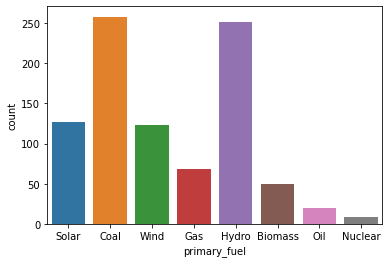

In [21]:
sns.countplot(x='primary_fuel',data=df)
plt.show()

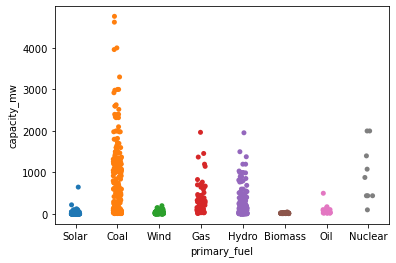

In [22]:
sns.stripplot(y='capacity_mw',x='primary_fuel',data= df)
plt.show()

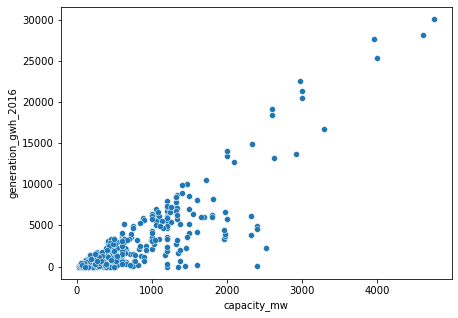

In [23]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2016',data= df)
plt.show()

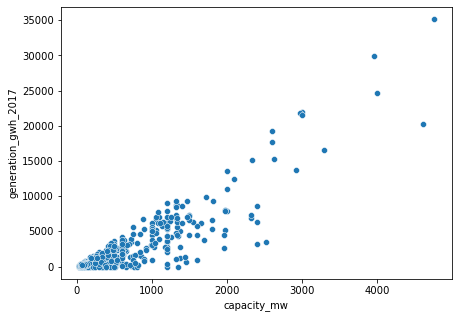

In [24]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2017',data= df)
plt.show()

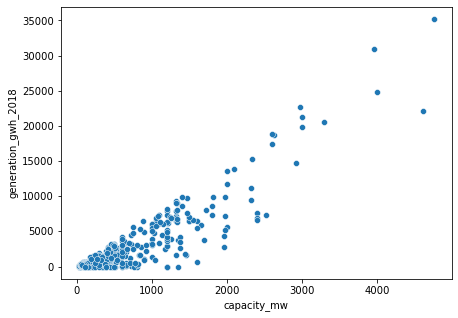

In [25]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2018',data= df)
plt.show()

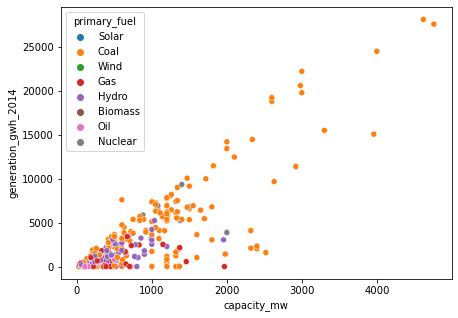

In [26]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2014',hue='primary_fuel',data= df)
plt.show()

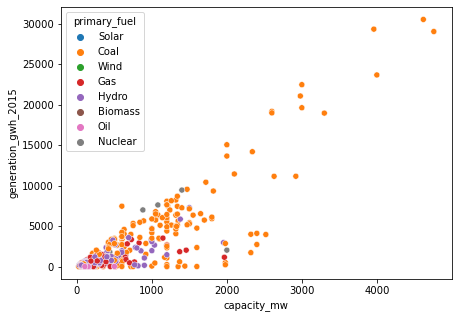

In [27]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2015',hue='primary_fuel',data= df)
plt.show()

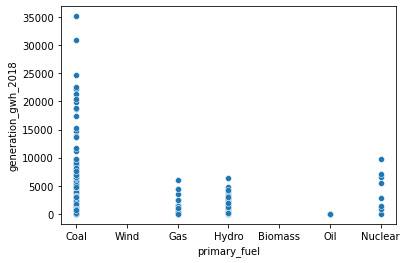

In [28]:
sns.scatterplot(x='primary_fuel',y='generation_gwh_2018',data= df)
plt.show()

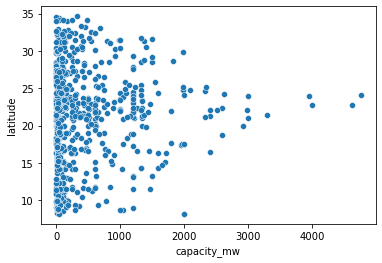

In [29]:
sns.scatterplot(x='capacity_mw',y='latitude',data= df)
plt.show()

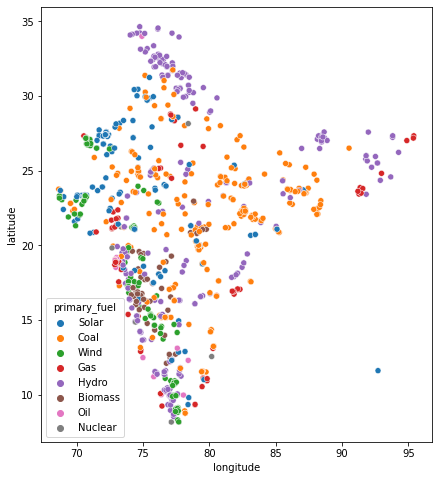

In [30]:
plt.figure(figsize=(7,8))
sns.scatterplot(x='longitude',y='latitude',hue='primary_fuel',data= df)
plt.show()

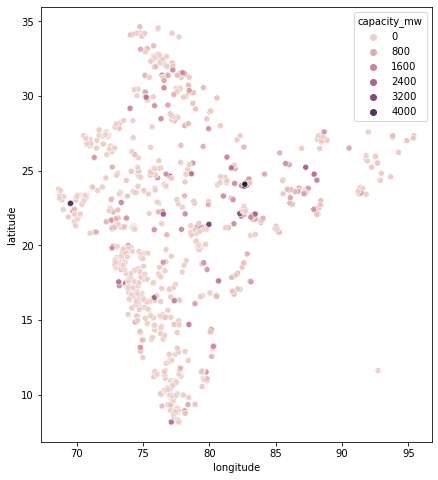

In [31]:
plt.figure(figsize=(7,8))
sns.scatterplot(x='longitude',y='latitude',hue='capacity_mw',data= df)
plt.show()

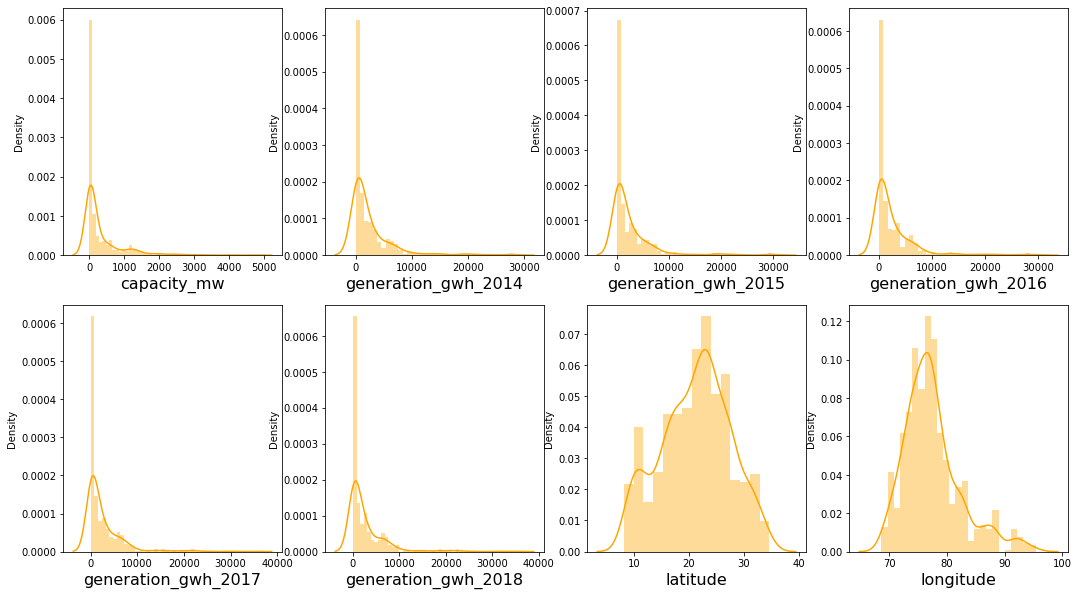

In [32]:
# distribution plot
plt.figure(figsize=(18,10))
pn=1
for i in ['capacity_mw','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017',
          'generation_gwh_2018','latitude', 'longitude']:
    if pn <=8:
        ax = plt.subplot(2,4,pn)
        sns.distplot(df[i],color='orange')
        plt.xlabel(i,fontsize=16)
    pn+=1
plt.show()

capacity_mw, longitude, generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017 and generation_gwh_2018 columns are  right skewed distribution. latitude column is left skewed distribution.

In [33]:
# correlation
df.corr()

,capacity_mw,latitude,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
capacity_mw,1.000000,0.051309,0.197129,0.839094,0.844352,0.870620,0.886673,0.901918
latitude,0.051309,1.000000,0.036362,0.060330,0.048610,0.041387,0.040568,0.040476
longitude,0.197129,0.036362,1.000000,0.013511,0.022760,0.050732,0.048678,0.045599
generation_gwh_2014,0.839094,0.060330,0.013511,1.000000,0.961098,0.937060,0.912561,0.902781
generation_gwh_2015,0.844352,0.048610,0.022760,0.961098,1.000000,0.974918,0.940191,0.934371
generation_gwh_2016,0.870620,0.041387,0.050732,0.937060,0.974918,1.000000,0.972024,0.962073
generation_gwh_2017,0.886673,0.040568,0.048678,0.912561,0.940191,0.972024,1.000000,0.985856
generation_gwh_2018,0.901918,0.040476,0.045599,0.902781,0.934371,0.962073,0.985856,1.000000


In [34]:
# checking skewness
df.skew()

capacity_mw            3.123576
latitude              -0.145866
longitude              1.112646
generation_gwh_2014    3.342707
generation_gwh_2015    3.665904
generation_gwh_2016    3.512370
generation_gwh_2017    3.566070
generation_gwh_2018    3.476298
dtype: float64

Here capacity_mw is the target variable we will not work on its skewness.

In [35]:
# list of skewed columns
skew_col=['generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017',
          'generation_gwh_2018','longitude']

In [36]:
# reducing skew()
df[skew_col] = np.cbrt(df[skew_col])
df[skew_col].skew()

generation_gwh_2014    0.556096
generation_gwh_2015    0.610728
generation_gwh_2016    0.573417
generation_gwh_2017    0.509786
generation_gwh_2018    0.512794
longitude              0.979703
dtype: float64

In [37]:
# dropping missing values of longitude column
df.dropna(subset=['longitude'],axis=0,inplace=True)

In [38]:
# list of columns
n_col = ['generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']

In [39]:
# saving some columns in different dataframe and checking null values
df1 = df[n_col]
df1.isnull().sum().sum()

2211

In [40]:
# filling some missig values using rows mean
for i in df1.T.columns:
    df1.T[i].replace(np.nan,df1.T[i].mean(),inplace=True)

In [41]:
df1.isnull().sum().sum()

2120

In [42]:
df1.shape

(861, 5)

In [43]:
# saving back
df[n_col] = df1

In [44]:
# encoding categorical columns
from sklearn.preprocessing import OneHotEncoder
OHE = OneHotEncoder(sparse=False)
for i in ['source','geolocation_source']:
    df[i] = OHE.fit_transform(df[i].values.reshape(-1,1))

In [45]:
# replacing nan values
for i in ['other_fuel1','other_fuel2']:
    df[i].replace(np.nan,'-',inplace=True)

In [46]:
# replacing values
energy_s = ['Coal','Hydro','Solar','Wind','Gas','Biomass','Oil','Nuclear','Cogeneration','-']


for i in range(len(energy_s)):
    for j in energy_s:
        if energy_s[i]==j:
            df.replace(j,i,inplace=True)

energy_source = pd.DataFrame()
energy_source['Energy source']= [j for j in energy_s] 
energy_source['code'] = [i for i in range(len(energy_s))]
energy_source

,Energy source,code
0,Coal,0
1,Hydro,1
2,Solar,2
3,Wind,3
4,Gas,4
5,Biomass,5
6,Oil,6
7,Nuclear,7
8,Cogeneration,8
9,-,9


In [47]:
# replacing NaN values
df.replace(np.nan,0,inplace=True)

In [48]:
df

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,4.183928,2,9,9,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,98.0,24.7663,4.209822,0,9,9,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
2,39.2,21.9038,4.108947,3,9,9,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
3,135.0,23.8712,4.503868,4,9,9,0.0,0.0,8.516872,9.449397,9.604586,8.723154,8.555526
4,1800.0,21.9603,4.351694,0,6,9,0.0,0.0,14.479241,18.086385,18.413278,17.528476,19.380155
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,4.260882,0,6,9,0.0,0.0,6.377031,0.998289,6.158697,9.529548,8.821590
903,3.0,12.8932,4.275677,2,9,9,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
904,25.5,15.2758,4.228027,3,9,9,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
905,80.0,24.3500,4.193560,0,9,9,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000


#### Regression problem

In [49]:
# separating target variable and features
x_r = df.drop('capacity_mw', axis=1)
y_r = df['capacity_mw']

In [50]:
# scaling features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
col =['latitude','longitude','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016',
      'generation_gwh_2017','generation_gwh_2018']
x_r[col] = scaler.fit_transform(x_r[col])

In [51]:
x_r

,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,1.120269,-0.868702,2,9,9,0.0,0.0,-0.772226,-0.761998,-0.761960,-0.757869,-0.761364
1,0.572224,-0.576864,0,9,9,0.0,0.0,-0.772226,-0.761998,-0.761960,-0.757869,-0.761364
2,0.113195,-1.713752,3,9,9,0.0,0.0,-0.772226,-0.761998,-0.761960,-0.757869,-0.761364
3,0.428686,2.737125,4,9,9,0.0,0.0,0.502167,0.639068,0.648123,0.499459,0.457097
4,0.122255,1.022080,0,6,9,0.0,0.0,1.394325,1.919678,1.941358,1.768630,1.998718
...,...,...,...,...,...,...,...,...,...,...,...,...
902,-0.786246,-0.001404,0,6,9,0.0,0.0,0.181979,-0.613981,0.142220,0.615690,0.494989
903,-1.331741,0.165337,2,9,9,0.0,1.0,-0.772226,-0.761998,-0.761960,-0.757869,-0.761364
904,-0.949668,-0.371691,3,9,9,0.0,0.0,-0.772226,-0.761998,-0.761960,-0.757869,-0.761364
905,0.505466,-0.760146,0,9,9,0.0,0.0,-0.772226,-0.761998,-0.761960,-0.757869,-0.761364


#### Models

In [52]:
# importing required libraries
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor,ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [53]:
# creating lists of models
LR = LinearRegression()
RFR = RandomForestRegressor()
DTR = DecisionTreeRegressor()
GBR = GradientBoostingRegressor()
KNN = KNeighborsRegressor()
ETR = ExtraTreesRegressor()
svr = SVR()

model_list= [LR,RFR,GBR,KNN,ETR,svr,DTR]

In [54]:
# train-test split
x_train,x_test,y_train,y_test = train_test_split(x_r,y_r,test_size=0.30, random_state=187)

In [55]:
# function for model
def model(name):
    name.fit(x_train,y_train)
    y_pred=name.predict(x_test)
    train_pred = name.predict(x_train)
    score_r2 = r2_score(y_test,y_pred)
    train_score = r2_score(y_train,train_pred)
    MAE = mean_absolute_error(y_test,y_pred)
    MSE = mean_squared_error(y_test,y_pred)
    RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
    print('r2 score =',score_r2,'\nr2 score on training data =',train_score,'\nMean absolute error =',MAE,
          '\nMean squared error =',MSE,'\nRoot mean squared error =',RMSE)
    
    print('\nCross validation:-\n')
    score_cv = cross_val_score(name,x_r,y_r,cv=5)
    cv_mean = score_cv.mean()
    diff = (score_r2 - cv_mean)*100
    print('cross validation scores:-',score_cv,'\ncross validation mean score:-',cv_mean,
          '\nDifference between r2 score and cross validation mean score =',diff)

In [56]:
# All models
for i in model_list:
    print('\n__________________ Using',i,'_________________\n')
    model(i)


__________________ Using LinearRegression() _________________

r2 score = 0.7086698899731998 
r2 score on training data = 0.7151277491224655 
Mean absolute error = 183.16730268346157 
Mean squared error = 69439.5902846761 
Root mean squared error = 263.5139280658161

Cross validation:-

cross validation scores:- [0.69286988 0.60858544 0.64910642 0.76107209 0.7066709 ] 
cross validation mean score:- 0.6836609459831128 
Difference between r2 score and cross validation mean score = 2.500894399008702

__________________ Using RandomForestRegressor() _________________

r2 score = 0.8351113955499173 
r2 score on training data = 0.9805994024417285 
Mean absolute error = 96.07452317889319 
Mean squared error = 39301.79800011905 
Root mean squared error = 198.24681081954142

Cross validation:-

cross validation scores:- [0.85878089 0.84276307 0.82023447 0.8878237  0.86131822] 
cross validation mean score:- 0.8541840692307072 
Difference between r2 score and cross validation mean score = -1.907

Here LinearRegression model is the best model.

#### Hyperparameter tuning

In [57]:
# parameters for LinearRegression model
param = {'n_jobs': [-2,-1,1],'positive':['False','True'],'fit_intercept':['True','False']}

GSCV= GridSearchCV(estimator=LR,param_grid=param,cv=5)
GSCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': ['True', 'False'],
                         'n_jobs': [-2, -1, 1], 'positive': ['False', 'True']})

In [58]:
# finding best parameter value
GSCV.best_params_

{'fit_intercept': 'True', 'n_jobs': -2, 'positive': 'False'}

In [59]:
# using best parameter value
Model_reg = LinearRegression(n_jobs=-2, positive=False,fit_intercept=True)

In [60]:
# final model
Model_reg.fit(x_train,y_train)
y_pred=Model_reg.predict(x_test)
score_r2 = r2_score(y_test,y_pred)
MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
print('r2 score =',score_r2,'\nMean absolute error =',MAE,'\nMean squared error =',MSE,'\nRoot mean squared error =',RMSE)

r2 score = 0.7086698899731998 
Mean absolute error = 183.16730268346157 
Mean squared error = 69439.5902846761 
Root mean squared error = 263.5139280658161


In [61]:
# saving model
import pickle
pickle.dump(Model_reg,open('GPP_capacity.pkl','wb'))

#### Classification problem

In [62]:
df

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,4.183928,2,9,9,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,98.0,24.7663,4.209822,0,9,9,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
2,39.2,21.9038,4.108947,3,9,9,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
3,135.0,23.8712,4.503868,4,9,9,0.0,0.0,8.516872,9.449397,9.604586,8.723154,8.555526
4,1800.0,21.9603,4.351694,0,6,9,0.0,0.0,14.479241,18.086385,18.413278,17.528476,19.380155
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,4.260882,0,6,9,0.0,0.0,6.377031,0.998289,6.158697,9.529548,8.821590
903,3.0,12.8932,4.275677,2,9,9,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
904,25.5,15.2758,4.228027,3,9,9,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
905,80.0,24.3500,4.193560,0,9,9,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000


In [63]:
# separating target variable and features
x_c = df.drop('primary_fuel',axis=1)
y_c = df['primary_fuel']

In [64]:
# scaling features
col_1 =['capacity_mw','latitude','longitude','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016',
      'generation_gwh_2017','generation_gwh_2018']
x_c[col_1] = scaler.fit_transform(x_c[col_1])

In [65]:
x_c

,capacity_mw,latitude,longitude,other_fuel1,other_fuel2,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,-0.561750,1.120269,-0.868702,9,9,0.0,0.0,-0.772226,-0.761998,-0.761960,-0.757869,-0.761364
1,-0.402975,0.572224,-0.576864,9,9,0.0,0.0,-0.772226,-0.761998,-0.761960,-0.757869,-0.761364
2,-0.500734,0.113195,-1.713752,9,9,0.0,0.0,-0.772226,-0.761998,-0.761960,-0.757869,-0.761364
3,-0.341461,0.428686,2.737125,9,9,0.0,0.0,0.502167,0.639068,0.648123,0.499459,0.457097
4,2.426707,0.122255,1.022080,6,9,0.0,0.0,1.394325,1.919678,1.941358,1.768630,1.998718
...,...,...,...,...,...,...,...,...,...,...,...,...
902,2.094194,-0.786246,-0.001404,6,9,0.0,0.0,0.181979,-0.613981,0.142220,0.615690,0.494989
903,-0.560919,-1.331741,0.165337,9,9,0.0,1.0,-0.772226,-0.761998,-0.761960,-0.757869,-0.761364
904,-0.523511,-0.949668,-0.371691,9,9,0.0,0.0,-0.772226,-0.761998,-0.761960,-0.757869,-0.761364
905,-0.432902,0.505466,-0.760146,9,9,0.0,0.0,-0.772226,-0.761998,-0.761960,-0.757869,-0.761364


#### Models

In [66]:
# importing required libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report,roc_curve,confusion_matrix,auc,roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier,ExtraTreesClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [67]:
# creating lists of models
LgR = LogisticRegression()
RFC = RandomForestClassifier()
ABC = AdaBoostClassifier()
DTC = DecisionTreeClassifier()
GBC = GradientBoostingClassifier()
Knn = KNeighborsClassifier()
ETC = ExtraTreesClassifier()
svc = SVC()

In [68]:
# train-test split
x_train,x_test,y_train,y_test = train_test_split(x_c,y_c,test_size=0.30, random_state=107)

In [69]:
# LogisticRegression model 
LgR.fit(x_train,y_train)
y_pred=LgR.predict(x_test)
acc_score = accuracy_score(y_test,y_pred)
CM = confusion_matrix(y_test,y_pred)
CR = classification_report(y_test,y_pred)
print('Accuracy score =',acc_score,'\n\nconfusion matrix:-\n',CM,'\n\nclassification report:-\n',CR)

print('checking Cross validation score:-\n')
score_cv = cross_val_score(LgR,x_c,y_c,cv=5)
cv_mean = score_cv.mean()
diff = (acc_score - cv_mean)*100
print('cross validation scores:-',score_cv,'\ncross validation mean score =',cv_mean,
          '\nDifference between accuracy score and cross validation mean score =',diff)

Accuracy score = 0.7027027027027027 

confusion matrix:-
 [[59 15  0  2  0  0  0  0]
 [ 0 59  0 10  1  0  0  1]
 [ 0  0 29  1  0  0  0  0]
 [ 1  0  0 33  0  1  0  0]
 [ 4 17  0  3  2  0  0  0]
 [ 0  1  0 12  0  0  0  0]
 [ 1  1  0  3  0  0  0  0]
 [ 0  3  0  0  0  0  0  0]] 

classification report:-
               precision    recall  f1-score   support

           0       0.91      0.78      0.84        76
           1       0.61      0.83      0.71        71
           2       1.00      0.97      0.98        30
           3       0.52      0.94      0.67        35
           4       0.67      0.08      0.14        26
           5       0.00      0.00      0.00        13
           6       0.00      0.00      0.00         5
           7       0.00      0.00      0.00         3

    accuracy                           0.70       259
   macro avg       0.46      0.45      0.42       259
weighted avg       0.69      0.70      0.66       259

checking Cross validation score:-

cross valida

In [70]:
# RandomForestClassifier model
RFC.fit(x_train,y_train)
y_pred=RFC.predict(x_test)
acc_score = accuracy_score(y_test,y_pred)
CM = confusion_matrix(y_test,y_pred)
CR = classification_report(y_test,y_pred)
print('Accuracy score =',acc_score,'\n\nconfusion matrix:-\n',CM,'\n\nclassification report:-\n',CR)

print('checking Cross validation score:-\n')
score_cv = cross_val_score(RFC,x_c,y_c,cv=5)
cv_mean = score_cv.mean()
diff = (acc_score - cv_mean)*100
print('cross validation scores:-',score_cv,'\ncross validation mean score =',cv_mean,
          '\nDifference between accuracy score and cross validation mean score =',diff)

Accuracy score = 0.8262548262548263 

confusion matrix:-
 [[69  2  0  0  0  4  1  0]
 [ 1 65  0  5  0  0  0  0]
 [ 1  0 29  0  0  0  0  0]
 [ 4  4  0 26  0  1  0  0]
 [ 3 10  0  0 12  1  0  0]
 [ 0  1  0  0  0 12  0  0]
 [ 1  1  0  1  1  0  1  0]
 [ 1  2  0  0  0  0  0  0]] 

classification report:-
               precision    recall  f1-score   support

           0       0.86      0.91      0.88        76
           1       0.76      0.92      0.83        71
           2       1.00      0.97      0.98        30
           3       0.81      0.74      0.78        35
           4       0.92      0.46      0.62        26
           5       0.67      0.92      0.77        13
           6       0.50      0.20      0.29         5
           7       0.00      0.00      0.00         3

    accuracy                           0.83       259
   macro avg       0.69      0.64      0.64       259
weighted avg       0.82      0.83      0.81       259

checking Cross validation score:-

cross valida

In [71]:
# KNeighborsClassifier model
Knn.fit(x_train,y_train)
y_pred=Knn.predict(x_test)
acc_score = accuracy_score(y_test,y_pred)
CM = confusion_matrix(y_test,y_pred)
CR = classification_report(y_test,y_pred)
print('Accuracy score =',acc_score,'\n\nconfusion matrix:-\n',CM,'\n\nclassification report:-\n',CR)

print('checking Cross validation score:-\n')
score_cv = cross_val_score(Knn,x_c,y_c,cv=5)
cv_mean = score_cv.mean()
diff = (acc_score - cv_mean)*100
print('cross validation scores:-',score_cv,'\ncross validation mean score =',cv_mean,
          '\nDifference between accuracy score and cross validation mean score =',diff)

Accuracy score = 0.8108108108108109 

confusion matrix:-
 [[75  0  0  1  0  0  0  0]
 [ 3 60  0  5  2  0  1  0]
 [ 0  0 30  0  0  0  0  0]
 [ 2  1  0 30  0  1  1  0]
 [ 3 17  0  0  5  1  0  0]
 [ 2  1  0  1  0  9  0  0]
 [ 1  1  0  0  2  1  0  0]
 [ 1  1  0  0  0  0  0  1]] 

classification report:-
               precision    recall  f1-score   support

           0       0.86      0.99      0.92        76
           1       0.74      0.85      0.79        71
           2       1.00      1.00      1.00        30
           3       0.81      0.86      0.83        35
           4       0.56      0.19      0.29        26
           5       0.75      0.69      0.72        13
           6       0.00      0.00      0.00         5
           7       1.00      0.33      0.50         3

    accuracy                           0.81       259
   macro avg       0.71      0.61      0.63       259
weighted avg       0.79      0.81      0.79       259

checking Cross validation score:-

cross valida

In [72]:
# ExtraTreesclassifier model
ETC.fit(x_train,y_train)
y_pred=ETC.predict(x_test)
acc_score = accuracy_score(y_test,y_pred)
CM = confusion_matrix(y_test,y_pred)
CR = classification_report(y_test,y_pred)
print('Accuracy score =',acc_score,'\n\nconfusion matrix:-\n',CM,'\n\nclassification report:-\n',CR)

print('checking Cross validation score:-\n')
score_cv = cross_val_score(ETC,x_c,y_c,cv=5)
cv_mean = score_cv.mean()
diff = (acc_score - cv_mean)*100
print('cross validation scores:-',score_cv,'\ncross validation mean score =',cv_mean,
          '\nDifference between accuracy score and cross validation mean score =',diff)

Accuracy score = 0.8185328185328186 

confusion matrix:-
 [[71  1  0  1  1  1  1  0]
 [ 1 63  0  7  0  0  0  0]
 [ 1  0 29  0  0  0  0  0]
 [ 3  1  0 27  0  3  1  0]
 [ 3 14  0  0  8  1  0  0]
 [ 0  1  0  0  0 12  0  0]
 [ 1  1  0  1  1  0  1  0]
 [ 1  1  0  0  0  0  0  1]] 

classification report:-
               precision    recall  f1-score   support

           0       0.88      0.93      0.90        76
           1       0.77      0.89      0.82        71
           2       1.00      0.97      0.98        30
           3       0.75      0.77      0.76        35
           4       0.80      0.31      0.44        26
           5       0.71      0.92      0.80        13
           6       0.33      0.20      0.25         5
           7       1.00      0.33      0.50         3

    accuracy                           0.82       259
   macro avg       0.78      0.67      0.68       259
weighted avg       0.82      0.82      0.80       259

checking Cross validation score:-

cross valida

In [73]:
# DecisionTreeClassifier model
DTC.fit(x_train,y_train)
y_pred=DTC.predict(x_test)
acc_score = accuracy_score(y_test,y_pred)
CM = confusion_matrix(y_test,y_pred)
CR = classification_report(y_test,y_pred)
print('Accuracy score =',acc_score,'\n\nconfusion matrix:-\n',CM,'\n\nclassification report:-\n',CR)

print('checking Cross validation score:-\n')
score_cv = cross_val_score(DTC,x_c,y_c,cv=5)
cv_mean = score_cv.mean()
diff = (acc_score - cv_mean)*100
print('cross validation scores:-',score_cv,'\ncross validation mean score =',cv_mean,
          '\nDifference between accuracy score and cross validation mean score =',diff)

Accuracy score = 0.7915057915057915 

confusion matrix:-
 [[68  1  0  1  2  3  1  0]
 [ 1 58  0  5  6  1  0  0]
 [ 1  0 29  0  0  0  0  0]
 [ 3  0  0 23  1  5  3  0]
 [ 4  5  0  0 14  1  0  2]
 [ 0  1  0  2  0 10  0  0]
 [ 0  0  0  1  1  0  3  0]
 [ 1  2  0  0  0  0  0  0]] 

classification report:-
               precision    recall  f1-score   support

           0       0.87      0.89      0.88        76
           1       0.87      0.82      0.84        71
           2       1.00      0.97      0.98        30
           3       0.72      0.66      0.69        35
           4       0.58      0.54      0.56        26
           5       0.50      0.77      0.61        13
           6       0.43      0.60      0.50         5
           7       0.00      0.00      0.00         3

    accuracy                           0.79       259
   macro avg       0.62      0.66      0.63       259
weighted avg       0.80      0.79      0.79       259

checking Cross validation score:-

cross valida

In [74]:
# Support vector Machines model
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
acc_score = accuracy_score(y_test,y_pred)
CM = confusion_matrix(y_test,y_pred)
CR = classification_report(y_test,y_pred)
print('Accuracy score =',acc_score,'\n\nconfusion matrix:-\n',CM,'\n\nclassification report:-\n',CR)

print('checking Cross validation score:-\n')
score_cv = cross_val_score(svc,x_c,y_c,cv=5)
cv_mean = score_cv.mean()
diff = (acc_score - cv_mean)*100
print('cross validation scores:-',score_cv,'\ncross validation mean score =',cv_mean,
          '\nDifference between accuracy score and cross validation mean score =',diff)

Accuracy score = 0.6911196911196911 

confusion matrix:-
 [[56 11  2  7  0  0  0  0]
 [ 0 60  1 10  0  0  0  0]
 [ 0  0 30  0  0  0  0  0]
 [ 0  0  2 33  0  0  0  0]
 [ 2 20  0  4  0  0  0  0]
 [ 0  1  0 12  0  0  0  0]
 [ 1  1  0  3  0  0  0  0]
 [ 0  3  0  0  0  0  0  0]] 

classification report:-
               precision    recall  f1-score   support

           0       0.95      0.74      0.83        76
           1       0.62      0.85      0.72        71
           2       0.86      1.00      0.92        30
           3       0.48      0.94      0.63        35
           4       0.00      0.00      0.00        26
           5       0.00      0.00      0.00        13
           6       0.00      0.00      0.00         5
           7       0.00      0.00      0.00         3

    accuracy                           0.69       259
   macro avg       0.36      0.44      0.39       259
weighted avg       0.61      0.69      0.63       259

checking Cross validation score:-

cross valida

Here RandomForestClassifier is the best model. It has least difference between accuracy score and cross validation mean score.

#### Hyperparameter tuning

In [75]:
# parameter for RandomForestClassifier
param = {'n_estimators':[100,200,300],
         'criterion':['entropy','gini','log_loss'],
         'max_depth':[45,89,100],
         'random_state':[79,163,187,193]
        }

GSCV= GridSearchCV(estimator=RFC,param_grid=param,cv=5)
GSCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini', 'log_loss'],
                         'max_depth': [45, 89, 100],
                         'n_estimators': [100, 200, 300],
                         'random_state': [79, 163, 187, 193]})

In [76]:
# finding best parameter value
GSCV.best_params_

{'criterion': 'gini',
 'max_depth': 45,
 'n_estimators': 200,
 'random_state': 163}

In [77]:
Model_clf = RandomForestClassifier(criterion='gini',max_depth=45,n_estimators=200,random_state=163)

In [78]:
# final model
Model_clf.fit(x_train,y_train)
y_pred=Model_clf.predict(x_test)
acc_score = accuracy_score(y_test,y_pred)
CM = confusion_matrix(y_test,y_pred)
CR = classification_report(y_test,y_pred)
print('Accuracy score =',acc_score,'\n\nconfusion matrix:-\n',CM,'\n\nclassification report:-\n',CR)

Accuracy score = 0.8301158301158301 

confusion matrix:-
 [[68  2  0  1  1  3  1  0]
 [ 1 65  0  5  0  0  0  0]
 [ 1  0 29  0  0  0  0  0]
 [ 4  3  0 26  1  1  0  0]
 [ 3  9  0  0 13  1  0  0]
 [ 0  1  0  0  0 12  0  0]
 [ 1  1  0  1  1  0  1  0]
 [ 1  1  0  0  0  0  0  1]] 

classification report:-
               precision    recall  f1-score   support

           0       0.86      0.89      0.88        76
           1       0.79      0.92      0.85        71
           2       1.00      0.97      0.98        30
           3       0.79      0.74      0.76        35
           4       0.81      0.50      0.62        26
           5       0.71      0.92      0.80        13
           6       0.50      0.20      0.29         5
           7       1.00      0.33      0.50         3

    accuracy                           0.83       259
   macro avg       0.81      0.68      0.71       259
weighted avg       0.83      0.83      0.82       259



Accuracy score is 83.01%. Before hyperparameter tuning it accuracy was 82.62%.

In [80]:
# saving model
import pickle
pickle.dump(Model_clf,open('GPP_primaryfuel.pkl','wb'))